In [74]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
from ipywidgets import interact,fixed,FloatSlider,IntSlider,ToggleButtons
import pandas as pd
import datetime
import scipy
from scipy.integrate import odeint
import matplotlib.dates as mdates
import matplotlib
import scipy.stats as st
import networkx # to install networkx in your environment: conda install networkx
from covid19model.models import models
from covid19model.data import google
from covid19model.data import sciensano
from covid19model.data import polymod
from covid19model.data import parameters
from covid19model.visualization.output import population_status, infected
# OPTIONAL: Load the "autoreload" extension so that package code can change
%load_ext autoreload
# OPTIONAL: always reload modules so that as you change code in src, it gets loaded
%autoreload 2
import math

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [79]:
initN, Nc_home, Nc_work, Nc_schools, Nc_transport, Nc_leisure, Nc_others, Nc_total = polymod.get_interaction_matrices()
params = parameters.get_COVID19_SEIRD_parameters()
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# some required parameters are different, the 'parameter loading function' must be changed in the future
params.update({'beta':0.035,
               'Nc': Nc_total}) # add length of a discrete timestep to parameter dictionary (days)
del params['totalTests']
del params['dq']
del params['psi_FP']
del params['psi_PP']
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
levels = initN.size
initial_states = {'S': initN, 'E': 10*np.ones(levels)}

In [90]:
from covid19model.models.compliance import logistic,ramp_1,ramp_2
params.update({'l': 7,
               'tau': 5})
model = models.COVID19_SEIRD_sto(initial_states, params, compliance=ramp_2, discrete=True)

In [91]:
# Create checkpoints dictionary
chk = {'time':  [42], 
       'Nc':    [0.3*Nc_home+(1-0.70)*Nc_work + (1-0.80)*Nc_transport,
                ]
      }
# Run a checkpointed simulation
out=model.sim(150,checkpoints=chk)

0 0.0
1 0.0
2 0.0
3 0.0
4 0.0
5 0.0
6 0.1428571428571429
7 0.2857142857142858
8 0.4285714285714286
9 0.5714285714285714
10 0.7142857142857142
11 0.8571428571428572
12 1.0
13 1.0
14 1.0
15 1.0
16 1.0
17 1.0
18 1.0
19 1.0
20 1.0
21 1.0
22 1.0
23 1.0
24 1.0
25 1.0
26 1.0
27 1.0
28 1.0
29 1.0
30 1.0
31 1.0
32 1.0
33 1.0
34 1.0
35 1.0
36 1.0
37 1.0
38 1.0
39 1.0
40 1.0
41 1.0
42 1.0
43 1.0
44 1.0
45 1.0
46 1.0
47 1.0
48 1.0
49 1.0
50 1.0
51 1.0
52 1.0
53 1.0
54 1.0
55 1.0
56 1.0
57 1.0
58 1.0
59 1.0
60 1.0
61 1.0
62 1.0
63 1.0
64 1.0
65 1.0
66 1.0
67 1.0
68 1.0
69 1.0
70 1.0
71 1.0
72 1.0
73 1.0
74 1.0
75 1.0
76 1.0
77 1.0
78 1.0
79 1.0
80 1.0
81 1.0
82 1.0
83 1.0
84 1.0
85 1.0
86 1.0
87 1.0
88 1.0
89 1.0
90 1.0
91 1.0
92 1.0
93 1.0
94 1.0
95 1.0
96 1.0
97 1.0
98 1.0
99 1.0
100 1.0
101 1.0
102 1.0
103 1.0
104 1.0
105 1.0
106 1.0
107 1.0


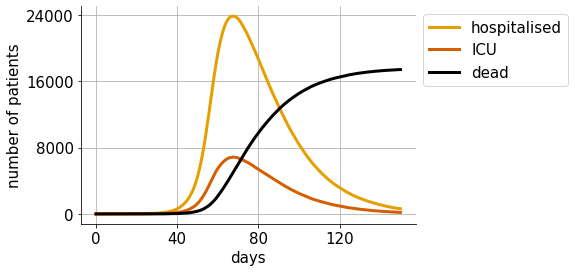

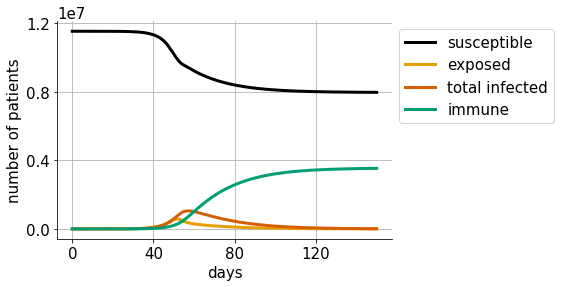

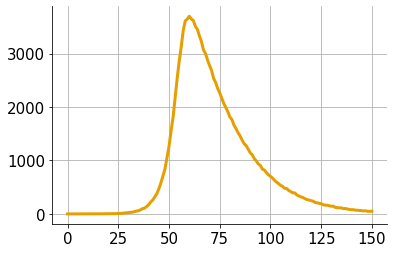

In [92]:
infected(out)
population_status(out)
plt.figure()
plt.plot(out["time"],out["H_in"].sum(dim="stratification"))